Konteks

Di industri perfilman, pemahaman yang mendalam tentang performa film sangat penting untuk keberhasilan jangka panjang. Penonton yang tidak tertarik atau menurunnya popularitas suatu film dapat memengaruhi pendapatan dan reputasi studio. Oleh karena itu, penting untuk memahami faktor-faktor yang memengaruhi kesuksesan atau kegagalan film, termasuk bagaimana rating, durasi, jumlah like di media sosial, dan genre dapat memengaruhi minat penonton.

Problem Statement

studi beserta para director menghadapi tantangan dalam mengidentifikasi film-film yang memiliki potensi rendah dalam menarik perhatian penonton. Variabel seperti pada data yang dimiliki dapat menjadi faktor yang perlu dianalisis untuk memahami performa film.

Dengan memahami variabel-variabel ini, dapat dikembangkan model prediksi yang dapat mengklasifikasikan film sebagai “High Popularity” atau “Low Popularity”. Dengan demikian, studio dapat membuat strategi yang lebih tepat untuk meningkatkan engagement penonton dan merencanakan promosi yang efektif.

Masalah ini penting karena pengaruhnya terhadap pendapatan dan keberhasilan film. Film yang kurang diminati dapat menandakan adanya ketidakcocokan dengan preferensi penonton, sehingga studio perlu menyesuaikan strategi produksi dan promosi untuk meningkatkan daya tarik film.

Tujuan

Berdasarkan permasalahan tersebut,  proses ini bertujuan untuk membersihkan data, standarisasi data, normalisasi data serta binning data agar data yang dimiliki nantinya dapat diproses lebih lanjut dengan baik. Dengan pemahaman ini, studio dapat mengambil langkah yang tepat dalam merencanakan strategi promosi, meningkatkan engagement penonton, dan mengoptimalkan produksi film.

In [72]:
import pandas as pd
import numpy as np

1. Menampilkan 5 Baris Data Set Pertama

In [73]:
#Untuk menampilkan 5 baris data set pertama
df = pd.read_excel('movie_sample_dataset.xlsx')
df.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,ZoÃ« Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


Data tersebut merupakan data yang menggambarkan film/movie di beberapa negara. Berikut adalah variabel-variabel yang terdapat dalam dataset :

1. Color : pewarnaan pada film
2. director_name : nama Director
3. duration : durasi
4. gross : Bruto
5. genres : genre film
6. movie_tittle : judul film
7. title_year : tahun film ditayangkan
8. language : bahasa
9. country : negara
10. budget : anggaran
11. imdb_score : skor imdb
12. actors : aktor
13. movie_facebook_likes : Jumlah like film di Facebook.

Data yang dimiliki mencakup berbagai variabel yang berkaitan dengan karakteristik dan performa film. Setiap baris dalam dataset mewakili satu film, sementara setiap kolom merepresentasikan atribut atau fitur tertentu yang dapat digunakan untuk menganalisis popularitas atau kesuksesan film. Variabel-variabel seperti durasi film, rating IMDB, jumlah like di Facebook, genre, dan jumlah votes dapat memberikan wawasan yang berharga tentang faktor-faktor yang memengaruhi minat penonton. Dengan memahami data ini, kita dapat mengembangkan model analisis atau prediksi yang tepat untuk mengidentifikasi film-film yang berpotensi diminati penonton dan merencanakan strategi promosi atau produksi yang lebih efektif.

2. Merubah Anomali Pada Dataset

In [74]:
# KOLOM DURATION

# Ganti data durasi anomali menjadi NaN
df.loc[(df["duration"] < 30) | (df["duration"] > 300), "duration"] = np.nan

# Mengetahui banyaknya pergantian anomali
print("Jumlah NaN setelah ganti durasi anomali:", df["duration"].isnull().sum())

# Lihat baris dengan durasi NaN
print(df[df["duration"].isnull()])


Jumlah NaN setelah ganti durasi anomali: 4
    color      director_name  duration        gross  \
6   Color      Peter Jackson       NaN  303001229.0   
16  Color  Quentin Tarantino       NaN  162804648.0   
34  Color     Gore Verbinski       NaN   89289910.0   
98  Color     Clint Eastwood       NaN   47034272.0   

                           genres                        movie_title  \
6               Adventure|Fantasy  The Hobbit: An Unexpected Journey   
16                  Drama|Western                   Django Unchained   
34       Action|Adventure|Western                    The Lone Ranger   
98  Biography|Drama|Music|Musical                        Jersey Boys   

    title_year language country       budget  imdb_score  \
6         2012  English     USA  180000000.0         7.9   
16        2012  English     USA  100000000.0         8.5   
34        2013  English     USA  215000000.0         6.5   
98        2014  English     USA   40000000.0         6.9   

                   

In [75]:
# KOLOM TITTLE YEARS

# Ganti tahun yang bukan 4 digit menjadi NaN
df.loc[df["title_year"].astype(str).str.len() != 4, "title_year"] = np.nan

# Mengetahui banyaknya pergantian anomali
print("Jumlah NaN di title_year setelah perbaikan:", df["title_year"].isnull().sum())

# Lihat baris dengan title_year NaN
print(df[df["title_year"].isnull()])


Jumlah NaN di title_year setelah perbaikan: 2
    color    director_name  duration        gross                   genres  \
5     NaN              NaN     183.0  330249062.0  Action|Adventure|Sci-Fi   
81  Color  Daniel Espinosa     137.0    1206135.0     Crime|Drama|Thriller   

                           movie_title  title_year language         country  \
5   Batman v Superman: Dawn of Justice         NaN  English             USA   
81                            Child 44         NaN  English  Czech Republic   

         budget  imdb_score                                    actors  \
5   250000000.0         6.9  Henry Cavill,Lauren Cohan,Alan D. Purwin   
81   50000000.0         6.4     Tom Hardy,Fares Fares,Michael Nardone   

    movie_facebook_likes  
5                 197000  
81                 18000  


In [76]:
#KOLOM IMDB_SCORE

import numpy as np

# Mengubah nilai negatif di kolom imdb_score menjadi NaN
df.loc[df["imdb_score"] < 0, "imdb_score"] = np.nan

# Mengetahui apakah masih terdapat nilai negatif
print("Jumlah nilai negatif:", (df["imdb_score"] < 0).sum())

# Lihat baris dengan imdb_score NaN
print("Jumlah NaN di imdb_score:", df["imdb_score"].isnull().sum())


Jumlah nilai negatif: 0
Jumlah NaN di imdb_score: 2


MENANGANI DAN BEKERJA DENGAN MISSING VALUE

1. Identifikasi Missing Value

In [77]:
import numpy as np
df.shape

# Replace "?"," ","N/A","Null", dan "Nan" menjadi NaN
df.replace(["?", " ", "N/A", "Null", "Nan"], np.nan, inplace=True)

# Mengetahui banyaknya missing value pada masing-masing kolom
print(df.isnull().sum())



color                   11
director_name           13
duration                 4
gross                    8
genres                   1
movie_title              0
title_year               2
language                 0
country                  0
budget                   4
imdb_score               2
actors                   0
movie_facebook_likes     0
dtype: int64


2. Menangani Missing Value

          a. Penanganan Drop berdasarkan Row

In [78]:
#KOLOM GROSS DAN BUDGET

print("Jumlah data sebelum drop:", len(df))

# drop row yang punya NaN di kolom "gross" atau "budget"
df.dropna(subset=["gross","budget"], axis=0, inplace=True)

# reset index biar rapi setelah row dihapus
df.reset_index(drop=True, inplace=True)

# cek jumlah data setelah drop
print("Jumlah data setelah drop:", len(df))

# cek apakah masih ada NaN
print("\nJumlah NaN di gross dan budget:")
print(df[["gross", "budget"]].isnull().sum())

# cek 5 baris awal
print("\n5 baris pertama:")
print(df.head())

# Cek 5 baris akhir
print("\n5 baris akhir:")
print(df.tail())

Jumlah data sebelum drop: 99
Jumlah data setelah drop: 89

Jumlah NaN di gross dan budget:
gross     0
budget    0
dtype: int64

5 baris pertama:
    color      director_name  duration        gross  \
0   Color    Martin Scorsese     240.0  116866727.0   
1   Color        Shane Black     195.0  408992272.0   
2  color   Quentin Tarantino     187.0   54116191.0   
3   Color   Kenneth Lonergan     186.0      46495.0   
4   Color      Peter Jackson     186.0  258355354.0   

                                 genres                          movie_title  \
0          Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1               Action|Adventure|Sci-Fi                           Iron Man 3   
2  Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                 Drama                             Margaret   
4                     Adventure|Fantasy  The Hobbit: The Desolation of Smaug   

   title_year language country       budge


          b. Penanganan Nilai Tidak Konsisten pada Kolom (Kolom color)



In [79]:
# Rapihin format huruf di kolom color
df["color"] = df["color"].str.title()

# Cek hasil
print(df["color"].unique())


['Color' 'Color ' nan ' Black And White']


In [80]:
# ubah hanya 'usa' jadi 'USA'
df['country'] = df['country'].replace('usa', 'USA')

# Cek hasil
print(df["country"].unique())

['USA' 'Germany' 'New Zealand' 'UK' 'United States' 'France' 'Australia'
 'Czech Republic']



          c. Penanganan Missing Data
             Penanganan missing data dengan mean
             "imdb_score" : 2 missing data
             "tittle_years" : 2 missing data
             Penanganan missing data dengan median
             "duration" : 4 missing data
             Penanganan missing data dengan Modus :
             "director_name" : 13 missing data
             "genres" : 1 missing data

MEAN

In [81]:
# KOLOM TITTLE YEAR

#Menghitung rata-rata mean
avg_title_year = df["title_year"].astype("float").mean(axis=0)
print("Average of title_year:", avg_title_year)

#replace missing title_year dengan mean
df["title_year"].replace(np.nan, avg_title_year, inplace=True)

Average of title_year: 2012.9310344827586


/tmp/ipython-input-4269497570.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["title_year"].replace(np.nan, avg_title_year, inplace=True)


In [82]:
# KOLOM IMDB_SCORE

#Menghitung rata-rata mean
avg_imdb_score = df["imdb_score"].astype("float").mean(axis=0)
print("Average of imdb_score:", avg_imdb_score)

#Replace missing imdb_score dengan mean
df["imdb_score"].replace(np.nan, avg_imdb_score, inplace=True)

Average of imdb_score: 7.178160919540229


/tmp/ipython-input-31027642.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["imdb_score"].replace(np.nan, avg_imdb_score, inplace=True)


MEDIAN

In [83]:
# KOLOM DURATION

#Menghitung rata-rata mean
median_duration = df['duration'].astype('float').median(axis=0)
print("Median of duration:", median_duration)

#Replace missing imdb_score dengan mean
df["duration"].replace(np.nan, median_duration, inplace=True)

Median of duration: 144.0


/tmp/ipython-input-3720359173.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["duration"].replace(np.nan, median_duration, inplace=True)


MODUS

KOLOM DIRECTOR_NAME TERHADAP GENRE

In [84]:
# tampilkan data director_name yang kosong beserta genres
print(df[["director_name","genres"]][df["director_name"].isnull()])

   director_name                            genres
5            NaN           Action|Adventure|Sci-Fi
10           NaN      Crime|Drama|Mystery|Thriller
23           NaN  Adventure|Drama|Thriller|Western
27           NaN            Adventure|Drama|Sci-Fi
30           NaN       Biography|Drama|History|War
37           NaN           Action|Adventure|Sci-Fi
54           NaN   Adventure|Drama|Sci-Fi|Thriller
63           NaN          Adventure|Mystery|Sci-Fi
67           NaN                       Crime|Drama
74           NaN             Biography|Crime|Drama
76           NaN                  Adventure|Sci-Fi
83           NaN                             Drama


In [85]:
# hitung jumlah director_name berdasarkan genre tertentu (Crime|Drama|Mystery|Thriller)
print("\nPerbandingan director pada genre Crime|Drama|Mystery|Thriller:")
print(df["director_name"][df['genres']=='Crime|Drama|Mystery|Thriller'].value_counts())

# hitung jumlah director_name berdasarkan genre tertentu (Drama)
print("\nPerbandingan director pada genre Drama:")
print(df["director_name"][df['genres']=='Drama'].value_counts())

# hitung jumlah director_name berdasarkan genre tertentu (Crime|Drama)
print("\nPerbandingan director pada genre Crime|Drama:")
print(df["director_name"][df['genres']=='Crime|Drama'].value_counts())

# hitung jumlah director_name berdasarkan genre tertentu ( Action|Adventure|Sci-Fi)
print("\nPerbandingan director pada genre Action|Adventure|Sci-Fi:")
print(df["director_name"][df['genres']=='Action|Adventure|Sci-Fi'].value_counts())


Perbandingan director pada genre Crime|Drama|Mystery|Thriller:
director_name
Denis Villeneuve    1
David Fincher       1
Name: count, dtype: int64

Perbandingan director pada genre Drama:
director_name
Kenneth Lonergan        1
Richard Linklater       1
Tate Taylor             1
Paul Thomas Anderson    1
Name: count, dtype: int64

Perbandingan director pada genre Crime|Drama:
director_name
David Dobkin    1
Name: count, dtype: int64

Perbandingan director pada genre Action|Adventure|Sci-Fi:
director_name
Joss Whedon      3
Michael Bay      2
Shane Black      1
Bryan Singer     1
Anthony Russo    1
Name: count, dtype: int64


In [86]:
# ambil director yang paling sering muncul
print("\nDirector paling umum di genre Crime|Drama|Mystery|Thriller:", df['director_name'][df['genres']=='Crime|Drama|Mystery|Thriller'].value_counts().idxmax())

# ambil director yang paling sering muncul
print("\nDirector paling umum di genre Drama:", df['director_name'][df['genres']=='Drama'].value_counts().idxmax())

# ambil director yang paling sering muncul
print("\nDirector paling umum di genre Crime|Drama:", df['director_name'][df['genres']=='Crime|Drama'].value_counts().idxmax())

# ambil director yang paling sering muncul pada genre Action
print("\nDirector paling umum di genre Action|Adventure|Sci-Fi:", df['director_name'][df['genres']=='Action|Adventure|Sci-Fi'].value_counts().idxmax())


Director paling umum di genre Crime|Drama|Mystery|Thriller: Denis Villeneuve

Director paling umum di genre Drama: Kenneth Lonergan

Director paling umum di genre Crime|Drama: David Dobkin

Director paling umum di genre Action|Adventure|Sci-Fi: Joss Whedon


In [87]:
# replace missing data
df.loc[(df["director_name"].isnull()) & (df["genres"]=="Crime|Drama|Mystery|Thriller"), "director_name"] = df["director_name"][df['genres']=="Crime|Drama|Mystery|Thriller"].value_counts().idxmax()

# replace missing data
df.loc[(df["director_name"].isnull()) & (df["genres"]=="Drama"), "director_name"] = df["director_name"][df['genres']=="Drama"].value_counts().idxmax()

# replace missing data
df.loc[(df["director_name"].isnull()) & (df["genres"]=="Crime|Drama"), "director_name"] = df["director_name"][df['genres']=="Crime|Drama"].value_counts().idxmax()

# replace missing 'director_name' dengan director paling sering (modus) di genre Action|Adventure|Sci-Fi
df.loc[(df["director_name"].isnull()) & (df["genres"]=="Action|Adventure|Sci-Fi"), "director_name"] = df["director_name"][df['genres']=="Action|Adventure|Sci-Fi"].value_counts().idxmax()

In [88]:
# tampilkan data director_name yang kosong beserta genres
print(df[["director_name","genres"]][df["director_name"].isnull()])

   director_name                            genres
23           NaN  Adventure|Drama|Thriller|Western
27           NaN            Adventure|Drama|Sci-Fi
30           NaN       Biography|Drama|History|War
54           NaN   Adventure|Drama|Sci-Fi|Thriller
63           NaN          Adventure|Mystery|Sci-Fi
74           NaN             Biography|Crime|Drama
76           NaN                  Adventure|Sci-Fi


In [89]:
# info sebelum diganti
print("\nJumlah director_name yang kosong sebelum diganti:", df["director_name"].isnull().sum())

# replace missing 'director_name' dengan 'Unknown'
df["director_name"] = df["director_name"].replace(np.nan, "Unknown")

# info setelah diganti
print("\nJumlah director_name yang kosong setelah diganti:", df["director_name"].isnull().sum())


Jumlah director_name yang kosong sebelum diganti: 7

Jumlah director_name yang kosong setelah diganti: 0


KOLOM COLOR TERHADAP TITLE YEAR

In [90]:
# ubah kolom title_year jadi integer biar rapi
df["title_year"] = df["title_year"].astype("int")

# tampilkan data color dengan title_year
print(df[["color","title_year"]][df["color"].isnull()])

   color  title_year
5    NaN        2012
9    NaN        2012
14   NaN        2014
17   NaN        2012
57   NaN        2012
66   NaN        2011
68   NaN        2012
72   NaN        2013
75   NaN        2012
79   NaN        2014


In [91]:
# hitung jumlah color berdasarkan title_year tertentu (misal 2011)
print("\nPerbandingan color pada title_year 2011:")
print(df["color"][df['title_year'] == 2011].value_counts()) # ()== 2011 adalah data int) kalau (=='2011' data string)

# hitung jumlah color berdasarkan title_year tertentu (misal 2012)
print("\nPerbandingan color pada title_year 2012:")
print(df["color"][df['title_year'] == 2012].value_counts())

# hitung jumlah color berdasarkan title_year tertentu (misal 2013)
print("\nPerbandingan color pada title_year 2013:")
print(df["color"][df['title_year'] == 2013].value_counts())

# hitung jumlah color berdasarkan title_year tertentu (misal 2014)
print("\nPerbandingan color pada title_year 2014:")
print(df["color"][df['title_year'] == 2014].value_counts())


Perbandingan color pada title_year 2011:
color
Color               7
 Black And White    1
Name: count, dtype: int64

Perbandingan color pada title_year 2012:
color
Color    17
Name: count, dtype: int64

Perbandingan color pada title_year 2013:
color
Color    16
Name: count, dtype: int64

Perbandingan color pada title_year 2014:
color
Color    19
Name: count, dtype: int64


In [92]:
# ambil director yang paling sering muncul
print("\ncolor paling umum di title year 2011 :", df['color'][df['title_year']== 2011 ].value_counts().idxmax())

# ambil director yang paling sering muncul
print("\ncolor paling umum di title year 2012 :", df['color'][df['title_year']== 2012 ].value_counts().idxmax())

# ambil director yang paling sering muncul
print("\ncolor paling umum di title year 2013 :", df['color'][df['title_year']== 2013 ].value_counts().idxmax())

# ambil director yang paling sering muncul
print("\ncolor paling umum di title year 2014 :", df['color'][df['title_year']== 2014 ].value_counts().idxmax())


color paling umum di title year 2011 : Color

color paling umum di title year 2012 : Color

color paling umum di title year 2013 : Color

color paling umum di title year 2014 : Color


In [93]:
# replace missing 'color' dengan color paling sering muncul di tittle year
df.loc[(df["color"].isnull()) & (df["title_year"]== 2011 ), "color"] = df["color"][df['title_year']== 2011 ].value_counts().idxmax()

# replace missing 'color' dengan color paling sering muncul di tittle year
df.loc[(df["color"].isnull()) & (df["title_year"]== 2012 ), "color"] = df["color"][df['title_year']== 2012 ].value_counts().idxmax()

# replace missing 'color' dengan color paling sering muncul di tittle year
df.loc[(df["color"].isnull()) & (df["title_year"]== 2013 ), "color"] = df["color"][df['title_year']== 2013 ].value_counts().idxmax()

# replace missing 'color' dengan color paling sering muncul di tittle year
df.loc[(df["color"].isnull()) & (df["title_year"]== 2014 ), "color"] = df["color"][df['title_year']== 2014 ].value_counts().idxmax()

KOLOM GENRES TERHADAP TITLE_YEAR

In [94]:
# tampilkan data director_name yang kosong beserta genres
print(df[["genres","title_year"]][df["genres"].isnull()])

   genres  title_year
11    NaN        2014


In [95]:
# hitung jumlah genres berdasarkan tittle year 2014
print("\nPerbandingan genres pada titlr_year 2014 :")
print(df["genres"][df['title_year']==2014].value_counts())

# ambil genre yang paling sering muncul
print("\ngenres paling umum di title year 2014:", df['genres'][df['title_year']== 2014 ].value_counts().idxmax())

# replace missing genres dengan  genres paling sering muncul di tittle year 2014
df.loc[(df["genres"].isnull()) & (df["title_year"]== 2014 ), "genres"] = df["genres"][df['title_year']== 2014 ].value_counts().idxmax()


Perbandingan genres pada titlr_year 2014 :
genres
Action|Adventure|Drama                      3
Action|Adventure|Sci-Fi                     2
Biography|Drama|Sport|War                   2
Drama                                       1
Adventure|Fantasy                           1
Crime|Drama|Mystery|Thriller                1
Action|Adventure|Fantasy|Sci-Fi|Thriller    1
Adventure|Drama|Sci-Fi                      1
Comedy|Crime|Drama|Mystery|Romance          1
Action|Adventure|Fantasy|Sci-Fi             1
Adventure|Mystery|Sci-Fi                    1
Crime|Drama                                 1
Biography|Drama|Music                       1
Comedy|Western                              1
Action|Drama|War                            1
Biography|Drama|Music|Musical               1
Name: count, dtype: int64

genres paling umum di title year 2014: Action|Adventure|Drama


3. Mengoresi Data Type Tiap Kolom

In [96]:
df.dtypes

,0
color,object
director_name,object
duration,float64
gross,float64
genres,object
movie_title,object
title_year,int64
language,object
country,object
budget,float64


STANDARIZATION

KOLOM BUDGET DAN GROSS

In [97]:
# Ubah budget dan gross ke juta/million USD
df["budget"] = df["budget"] / 1e6
df["gross"] = df["gross"] / 1e6

# Rename kolom
df.rename(columns={"budget": "budget_million_USD","gross": "gross_million_USD"}, inplace=True)

# cek hasil
print(df[["budget_million_USD", "gross_million_USD"]].head())

   budget_million_USD  gross_million_USD
0               100.0         116.866727
1               200.0         408.992272
2                44.0          54.116191
3                14.0           0.046495
4               225.0         258.355354


KOLOM MOVIE_FACEBOOK_LIKES

In [98]:
# Buat kolom scaled dan hapus kolom asli
df["movie_facebook_likes_scaled"] = df["movie_facebook_likes"] / 1000

# Drop kolom
df.drop(columns=["movie_facebook_likes"], inplace=True)

# Cek hasil
print(df[["movie_facebook_likes_scaled"]].head())


   movie_facebook_likes_scaled
0                        138.0
1                         95.0
2                        114.0
3                          0.0
4                         83.0


NORMALISASI

In [99]:
# Normalisasi kolom imdb_score
df["imdb_score_norm"] = (df["imdb_score"] / df["imdb_score"].max()).astype(float)

# cek hasil
print(df[["imdb_score_norm"]].head())


   imdb_score_norm
0         0.931818
1         0.818182
2         0.897727
3         0.738636
4         0.897727


In [100]:
# ubah duration dari menit ke jam
df["duration_hours"] = df["duration"] / 60

# normalisasi 0-1
df["duration_hours_norm"] = (df["duration_hours"] / df["duration_hours"].max()).astype(float)

# cek hasil
print(df[["duration_hours_norm"]].head())


   duration_hours_norm
0             1.000000
1             0.812500
2             0.779167
3             0.775000
4             0.775000


BINNING DATAA

KOLOM IMDB_SCORE

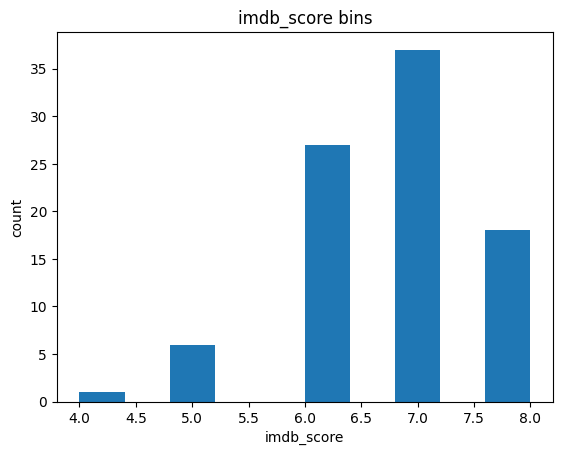

[4.         5.33333333 6.66666667 8.        ]
   imdb_score imdb_score-binned
0           8              High
1           7              High
2           7              High
3           6            Medium
4           7              High


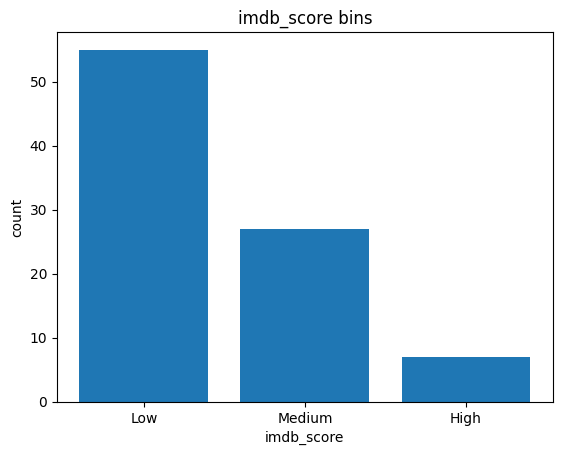

Perbandingan distribusi value imdb_score-binned:
imdb_score-binned
High      55
Medium    27
Low        7
Name: count, dtype: int64


In [101]:
import matplotlib.pyplot as plt

#Kolom IMDB_SCORE
df["imdb_score"] = df["imdb_score"].astype(int, copy=True)
plt.hist(df["imdb_score"])
plt.xlabel("imdb_score")
plt.ylabel("count")
plt.title("imdb_score bins")
plt.show()

bins = np.linspace(min(df["imdb_score"]), max(df["imdb_score"]), 4)
print(bins)

group_names = ['Low', 'Medium', 'High']

df['imdb_score-binned'] = pd.cut(df['imdb_score'], bins, labels=group_names, include_lowest=True)
print(df[['imdb_score','imdb_score-binned']].head(5))

plt.bar(group_names, df["imdb_score-binned"].value_counts())
plt.xlabel("imdb_score")
plt.ylabel("count")
plt.title("imdb_score bins")
plt.show()
print('Perbandingan distribusi value imdb_score-binned:')
print(df["imdb_score-binned"].value_counts())

KOLOM MOVIE_FACEBOOK_LIKES

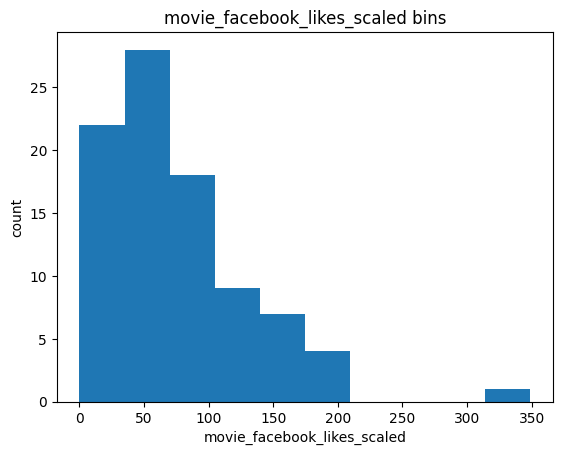

[  0.         116.33333333 232.66666667 349.        ]
   movie_facebook_likes_scaled movie_facebook_likes_scaled-binned
0                          138                             Medium
1                           95                                Low
2                          114                                Low
3                            0                                Low
4                           83                                Low


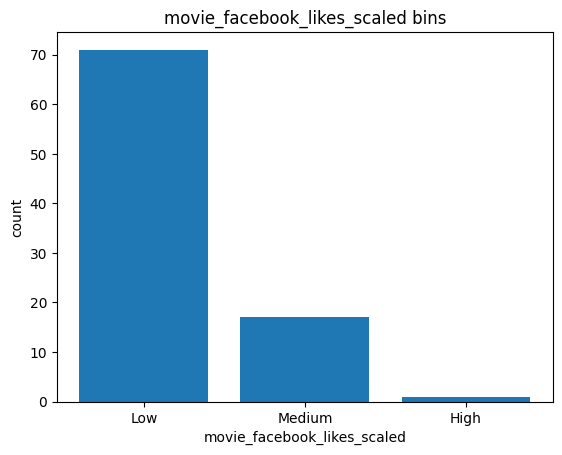

Perbandingan distribusi value movie_facebook_likes_scaled-binned:
movie_facebook_likes_scaled-binned
Low       71
Medium    17
High       1
Name: count, dtype: int64


In [102]:
#Kolom MOVIE_FACEBOOK_LIKES
df["movie_facebook_likes_scaled"] = df["movie_facebook_likes_scaled"].astype(int, copy=True)
plt.hist(df["movie_facebook_likes_scaled"])
plt.xlabel("movie_facebook_likes_scaled")
plt.ylabel("count")
plt.title("movie_facebook_likes_scaled bins")
plt.show()

bins = np.linspace(min(df["movie_facebook_likes_scaled"]), max(df["movie_facebook_likes_scaled"]), 4)
print(bins)

group_names = ['Low', 'Medium', 'High']

df['movie_facebook_likes_scaled-binned'] = pd.cut(df['movie_facebook_likes_scaled'], bins, labels=group_names, include_lowest=True)
print(df[['movie_facebook_likes_scaled','movie_facebook_likes_scaled-binned']].head(5))

plt.bar(group_names, df["movie_facebook_likes_scaled-binned"].value_counts())
plt.xlabel("movie_facebook_likes_scaled")
plt.ylabel("count")
plt.title("movie_facebook_likes_scaled bins")
plt.show()
print('Perbandingan distribusi value movie_facebook_likes_scaled-binned:')
print(df["movie_facebook_likes_scaled-binned"].value_counts())

In [103]:
from datetime import datetime

# Misal df_new adalah DataFrame yang sudah dibersihkan dan diolah
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_name = f"movies_cleaned_{timestamp}.xlsx"



In [104]:
df.to_csv('clean_df.csv', index=False)

In [105]:
from google.colab import files
files.download('clean_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>